In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
# loading the csv file in pandas dataframe
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [4]:
df.shape

(30, 17)

In [5]:
#checking for the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

In [7]:
df[['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']].groupby(['W'],as_index=False).mean()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,63,626.000000,5529.000000,1374.000000,272.0,37.0,130.0,387.0,1274.000000,88.000000,809.0,749.0,4.690000,1.000000,7.000000,35.000000,117.000000
1,64,640.000000,5571.000000,1382.000000,257.0,27.0,167.0,496.0,1255.000000,134.000000,754.0,700.0,4.330000,2.000000,8.000000,35.000000,90.000000
2,67,573.000000,5420.000000,1361.000000,251.0,18.0,100.0,471.0,1107.000000,69.000000,760.0,698.0,4.410000,3.000000,10.000000,44.000000,90.000000
3,68,695.333333,5550.666667,1420.666667,275.0,43.0,159.0,425.0,1233.666667,86.333333,770.0,715.0,4.486667,3.333333,8.666667,34.666667,112.333333
4,71,613.000000,5463.000000,1420.000000,236.0,40.0,120.0,375.0,1150.000000,112.000000,678.0,638.0,4.020000,0.000000,12.000000,35.000000,77.000000
5,74,669.500000,5531.000000,1419.500000,274.5,42.5,149.5,440.5,1293.000000,82.500000,767.0,700.5,4.365000,4.000000,9.000000,38.000000,89.000000
6,76,639.000000,5538.500000,1380.000000,261.0,24.5,167.0,441.0,1283.500000,68.500000,713.5,660.0,4.070000,6.500000,10.500000,41.000000,97.500000
7,78,748.000000,5640.000000,1495.000000,294.0,33.0,161.0,478.0,1148.000000,71.000000,753.0,694.0,4.310000,3.000000,10.000000,40.000000,97.000000
8,79,720.000000,5649.000000,1494.000000,289.0,48.0,154.0,490.0,1312.000000,132.000000,713.0,659.0,4.040000,1.000000,12.000000,44.000000,86.000000
9,80,644.000000,5485.000000,1383.000000,278.0,32.0,167.0,436.0,1310.000000,87.000000,642.0,604.0,3.740000,1.000000,12.000000,60.000000,95.000000


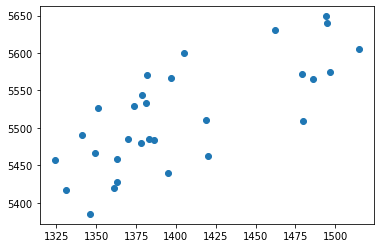

In [8]:
plt.scatter(x='H',y='AB',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182FF9A7C88>,
      dtype=object)

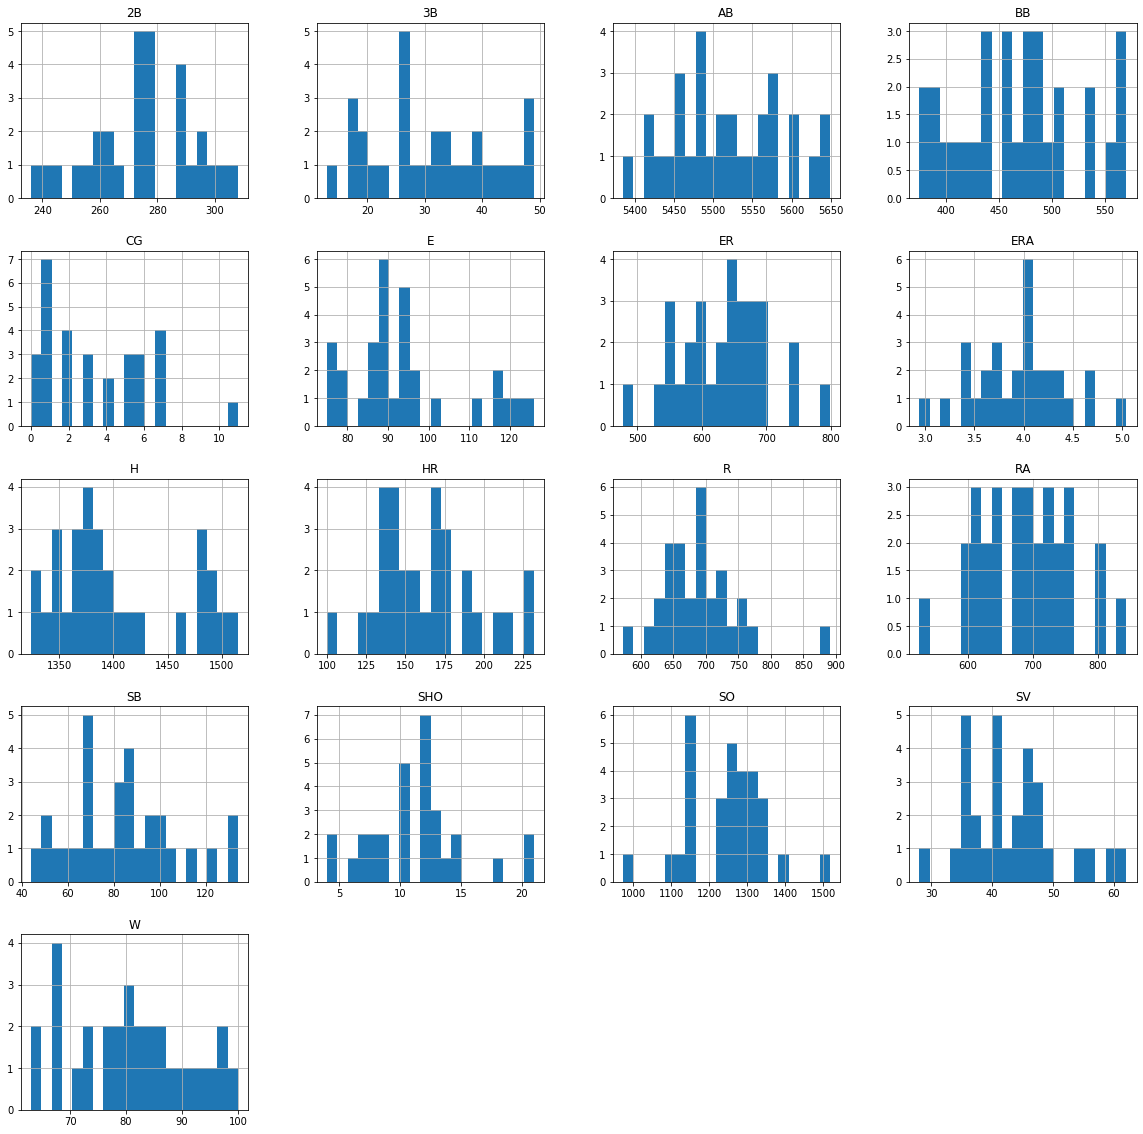

In [9]:
df.hist(figsize=(20,20),grid=True,layout=(5,4),bins=20)

In [10]:
#checking for te skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

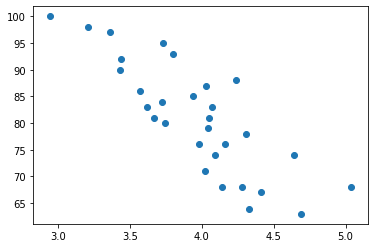

In [11]:
# Bivariate Analysis

plt.scatter(x='ERA',y='W',data=df)


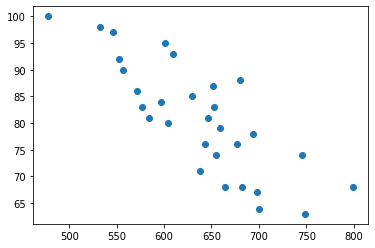

In [12]:
plt.scatter(x='ER',y='W',data=df)

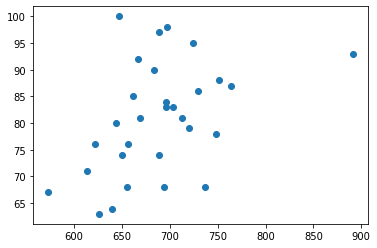

In [13]:
plt.scatter(x='R',y='W',data=df)

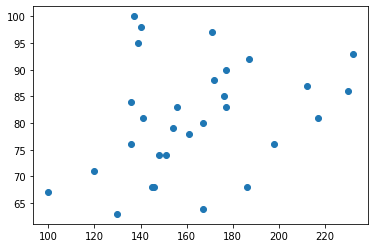

In [14]:
plt.scatter(x='HR',y='W',data=df)

In [15]:
df=df.drop(['CG'],axis=1)

In [16]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [17]:
#correlation among te attributes
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.106563,-0.183418,0.079149


In [18]:
#dropping the attributes as they are having high correlation with attributes ERA
df.drop(['ER','RA','E'],axis=1,inplace=True)

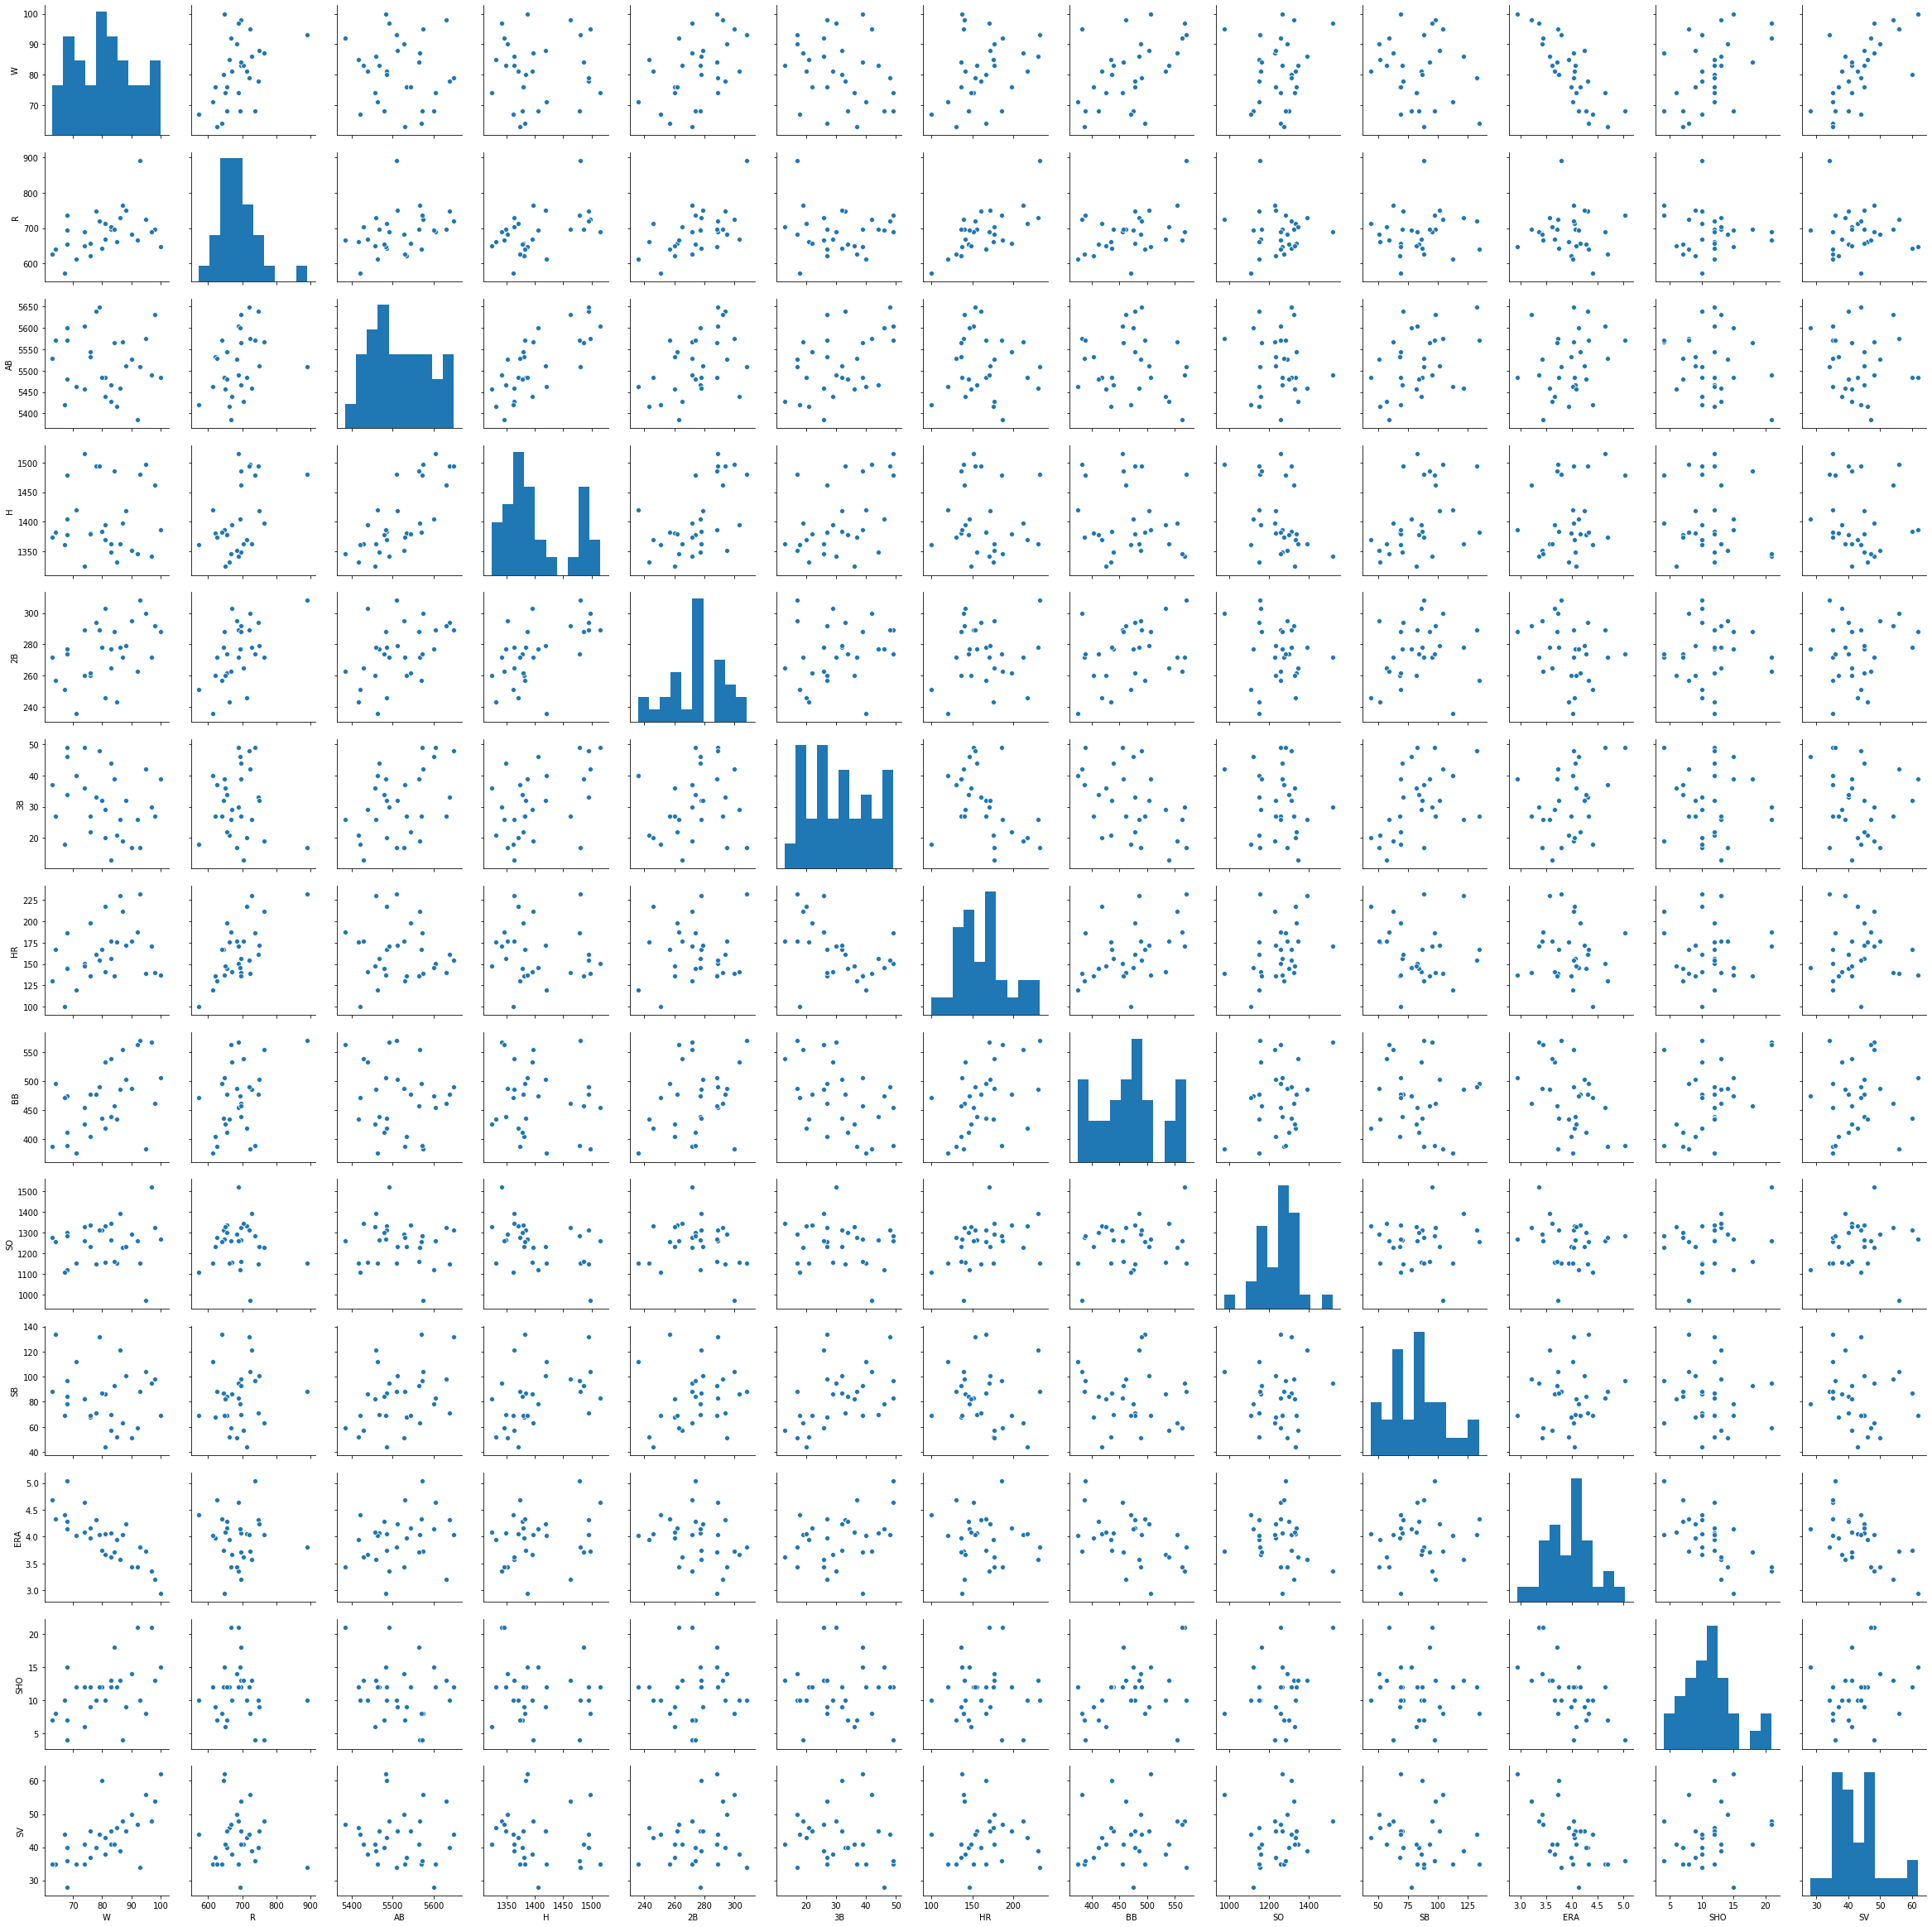

In [19]:
sns.pairplot(df)

In [20]:
#checking for the outliers and removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(df))

In [21]:
df=df[(z<3).all(axis=1)]
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,SHO,SV
0,95,724,5575,1497,300,42,139,383,973,104,3.73,8,56
1,83,696,5467,1349,277,44,156,439,1264,70,4.07,12,45
2,81,669,5439,1395,303,29,141,533,1157,86,3.67,10,38
3,76,622,5533,1381,260,27,136,404,1231,68,3.98,9,37
4,74,689,5605,1515,289,49,151,455,1259,83,4.64,12,35


In [22]:
df.shape

(29, 13)

In [23]:
y=df.iloc[:,0:1]
y.head()

,W
0,95
1,83
2,81
3,76
4,74


In [24]:
x=df.iloc[:,1:]
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,SHO,SV
0,724,5575,1497,300,42,139,383,973,104,3.73,8,56
1,696,5467,1349,277,44,156,439,1264,70,4.07,12,45
2,669,5439,1395,303,29,141,533,1157,86,3.67,10,38
3,622,5533,1381,260,27,136,404,1231,68,3.98,9,37
4,689,5605,1515,289,49,151,455,1259,83,4.64,12,35


In [25]:
# Using Standard scalaer for scaling the values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)



In [26]:
x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.511388,-0.813262,1.643157
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.238952,0.159299,0.211006
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.643801,-0.326982,-0.700362
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.040333,-0.570122,-0.830557
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.496876,0.159299,-1.090948


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 12)
(9, 12)
(20, 1)
(9, 1)


In [28]:
#Aapplying Linear regression and the targert variable is continuous
max_rscore=0
for r_state in range(42,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=r=lr.predict(x_test)
    r_scr=r2_score(y_test,pred)
    print("R2_score corresponding to random state:",r_state,"is:",r_scr)
    if r_scr>max_rscore:
        max_rscore=r_scr
        final_r_state=r_state
print()
print("max R2 score corresponding to r_state is",final_r_state,"is:",max_rscore)

R2_score corresponding to random state: 42 is: 0.8115361434430098
R2_score corresponding to random state: 43 is: 0.6552444987371532
R2_score corresponding to random state: 44 is: 0.7951170952964594
R2_score corresponding to random state: 45 is: 0.688603853468392
R2_score corresponding to random state: 46 is: 0.09488490093005297
R2_score corresponding to random state: 47 is: 0.28156468608919394
R2_score corresponding to random state: 48 is: 0.15486286040519592
R2_score corresponding to random state: 49 is: 0.3987647113774303
R2_score corresponding to random state: 50 is: 0.9351664659955736
R2_score corresponding to random state: 51 is: 0.5958548214506036
R2_score corresponding to random state: 52 is: 0.3104934055223657
R2_score corresponding to random state: 53 is: 0.529499983056027
R2_score corresponding to random state: 54 is: 0.12208780085517912
R2_score corresponding to random state: 55 is: -0.27842812083007384
R2_score corresponding to random state: 56 is: 0.7663742099825372
R2_sco

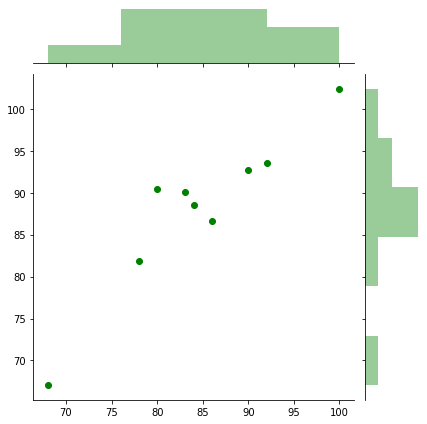

In [29]:
sns.jointplot(x=y_test,y=pred,color='g')

In [30]:
#using SVR Model to predict the wins
from sklearn.svm import SVR
model=SVR(kernel='linear')
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10, 20 ,100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid1_search = GridSearchCV(model, param_grid, cv=3)

In [31]:
grid1_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
grid1_search.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
model = SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)    
    r2_scr=r2_score(y,pred)
    print("The score is:",score)
    print("The r2 Score is:",r2_scr)
      

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.9275077169781505
The r2 Score is: 0.9275077169781505
The score is: 0.726989929278268
The r2 Score is: 0.726989929278268


In [34]:
#Using Lasso Regularization to reduce the complexity and minimizing the coefficient and to prevent multicollinearity
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.5, normalize=True)

lassoReg.fit(x_train,y_train)

def evaluate(x,y,dataset):
    pred = lassoReg.predict(x)
    score=lassoReg.score(x,y)
    rmsle=np.sqrt(mean_squared_log_error(y,pred))
    print('The score is:',score)
    print('The rmsle is:',rmsle)
    

evaluate(x_train,y_train,"training")
evaluate(x_test,y_test,"test")

The score is: 0.838526616080129
The rmsle is: 0.0531920675990993
The score is: 0.811203329243376
The rmsle is: 0.04310316491123018


In [35]:
#Found that the lasso regression is giving the best results .Hnce considering this model

In [38]:
from sklearn.externals import joblib
joblib.dump(lassoReg,'baseball_regression.pkl')

['baseball_regression.pkl']